<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/DecisionTrees_Boosting/Lab_Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Santander Customer Satisfaction
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Santander Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">SMOTE Algorithm</a>  
5. <a href="#item34">Decision Trees</a>  
7. <a href="#item34">Cross Validation y GridSearch</a>  
6. <a href="#item34">Random Forest</a>  
8. <a href="#item34">AdaBoost</a>  
9. <a href="#item34">XGBoost</a> 
10. <a href="#item34">RandomSearch</a> 
11. <a href="#item34">¿Cómo implementar un modelo?</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de ensemble.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de ensemble.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [ ]:

# Scikit-Learn 
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Santander Customer Satisfaction


Desde los equipos de soporte de primera línea hasta los ejecutivos, la satisfacción del cliente es una medida clave del éxito de una empresa. Los clientes insatisfechos no se quedan. Es más, los clientes insatisfechos rara vez expresan su insatisfacción antes de irse.

El banco Santander está pidiendo a la comunidad data scientist que los ayude a identificar clientes insatisfechos desde su primera interacción. Hacerlo permitiría a Santander tomar medidas proactivas para mejorar la felicidad de un cliente antes de que sea demasiado tarde.

En este laboratorio, trabajará con cientos de variables anónimas para predecir si un cliente está satisfecho o insatisfecho con su experiencia bancaria.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/4986/media/santander_custsat_red.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué clientes son clientes satisfechos? </div>


<b>Descripción de datos</b>

El data frame de Santander tiene 76,020 filas y 371 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables numéricas. La columna <b>"OBJETIVO"</b> es la variable a predecir. Es igual a uno para clientes insatisfechos y 0 para clientes satisfechos.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente insatisfecho.


---


<strong>Puede consultar este [link](https://www.kaggle.com/c/santander-customer-satisfaction/overview) para leer más sobre la fuente de datos Santander.</strong>


## Descargar y limpiar Dataset


In [ ]:
# Cargar Data
import pandas as pd
pddf = pd.read_csv("santander.csv")
pddf.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
pddf.shape

(76020, 371)

In [ ]:
# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

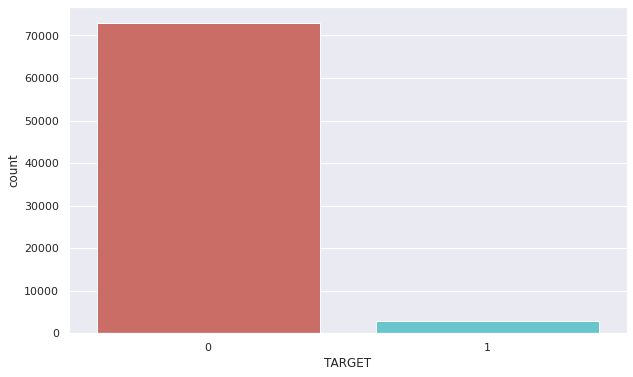

In [ ]:
# Analizando el target 
sns.countplot(x='TARGET', data = pddf, palette = 'hls')

In [ ]:
pddf[['TARGET']].describe()

,TARGET
count,76020.000000
mean,0.039569
std,0.194945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# Indentificar las variables 

features = list(set(pddf.columns.tolist()) - set(['ID','TARGET']))
features

In [ ]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.TARGET


In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


# SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.
¡Más información detallada sobre cómo funciona el algoritmo SMOTE!

<strong>Puede consultar este [link](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html) para leer más sobre SMOTE.</strong>

<img src="https://i.ytimg.com/vi/U3X98xZ4_no/maxresdefault.jpg" alt="HTML5 Icon" style="width: 400px; height: 250px;">





In [ ]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


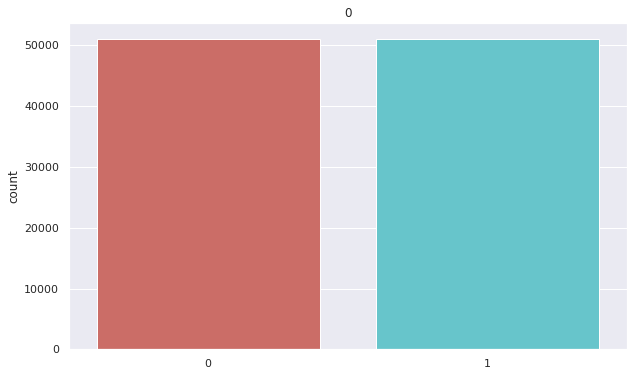

In [ ]:
# Analizando el target 
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [ ]:
# Cargar librerías 

from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 3, class_weight = {0: 1, 1: 25.272},
                               min_samples_leaf = int(round(y_train_res.shape[0]*0.05,0)),
                               random_state = 123)

dtree = dtree.fit(X_train, y_train)
    
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 25.272},
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5111,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=123, splitter='best')

In [ ]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


<b>Bondad de ajuste</b>

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_train,dTree_test
0,AUC,0.805864,0.791502
1,Gini,0.611728,0.583004
2,Accuracy,0.719867,0.721652
3,Precision,0.100543,0.097070
4,Recall,0.764957,0.727273
5,F1-score,0.177726,0.171279


In [ ]:
metricsDtree

,metric,dTree_train,dTree_test
0,AUC,0.797236,0.781922
1,Gini,0.594472,0.563845
2,Accuracy,0.960424,0.960449
3,Precision,0.000000,0.000000
4,Recall,0.000000,0.000000
5,F1-score,0.000000,0.000000


In [ ]:
metricsDtree_sm

,metric,dTree_train,dTree_test
0,AUC,0.779664,0.777347
1,Gini,0.559329,0.554693
2,Accuracy,0.788984,0.790976
3,Precision,0.113334,0.113732
4,Recall,0.634853,0.630820
5,F1-score,0.192333,0.192718


# Cross Validation



<b>evaluar el desempeño del estimador</b>
 
 ---

Aprender los parámetros de una función de predicción y probarlos con los mismos datos es un error metodológico: un modelo que simplemente repetiría las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta, pero no podría predecir nada útil datos no vistos.
Esta situación se llama Overfitting. Para evitarlo, es una práctica común cuando se realiza un modelo de machine learning (supervisado) mantener parte de los datos disponibles como un conjunto de pruebas X_test, y_test. 



Al evaluar diferentes configuraciones ("hiperparámetros") para estimadores, todavía existe el riesgo de Overfitting en el conjunto de prueba porque los parámetros se pueden ajustar hasta que el estimador funcione de manera óptima. De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el desempeño de generalización. Para resolver este problema, se puede presentar otra parte del conjunto de datos como el llamado "conjunto de validación": el entrenamiento continúa en el conjunto de entrenamiento, después de lo cual se realiza la evaluación en el conjunto de validación y cuando el experimento parece tener éxito , la evaluación final se puede realizar en el equipo de prueba.
 



 
Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente la cantidad de muestras que se pueden usar para aprender el modelo, y los resultados pueden depender de una elección aleatoria particular para el par de conjuntos (entrenamiento, validación).


Una solución a este problema es un procedimiento llamado validación cruzada. Un conjunto de prueba aún debe mantenerse para la evaluación final, pero el conjunto de validación ya no es necesario al hacer CV. En el enfoque básico, llamado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños . Se sigue el siguiente procedimiento para cada uno de los k "folds":







1.   Se entrena un modelo utilizando los folds como datos de entrenamiento

2.   El modelo resultante se valida en la parte restante de los datos (es decir, se utiliza como un conjunto de prueba para calcular una medida de rendimiento como la precisión)


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="HTML5 Icon" style="width: 400px; height: 250px;">

---

La medida de rendimiento informada por la validación cruzada de k veces es el promedio de los valores calculados en el ciclo. Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos (como es el caso cuando se fija un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas como la inferencia inversa donde el número de muestras es muy pequeño.

---


<strong>Puede consultar este [link](https://scikit-learn.org/stable/modules/cross_validation.html) para leer más sobre CrossValidation.</strong>







In [ ]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [ ]:
# Definiendo los parámetros a probar

parameters = {'max_depth': np.linspace(2, 15, 14),
              'min_samples_leaf' : np.linspace(0.01, 0.2, 9)}


In [ ]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 123)


In [ ]:
# Ejecutando grid search con 3 folds

GridSearch = GridSearchCV(dtree, parameters, cv = 3, verbose = 5, n_jobs = 3,
                          refit = 'AUC',
                          return_train_score = True)

GridSearch.fit(X_train_res, y_train_res.ravel())
#elapsed:  4.6min finished


Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   28.2s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 378 out of 378 | elapsed:  3.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=3,
             param_grid={'max_depth': array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9

In [ ]:
GridSearch.best_params_

{'max_depth': 8.0, 'min_samples_leaf': 0.01}

In [ ]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

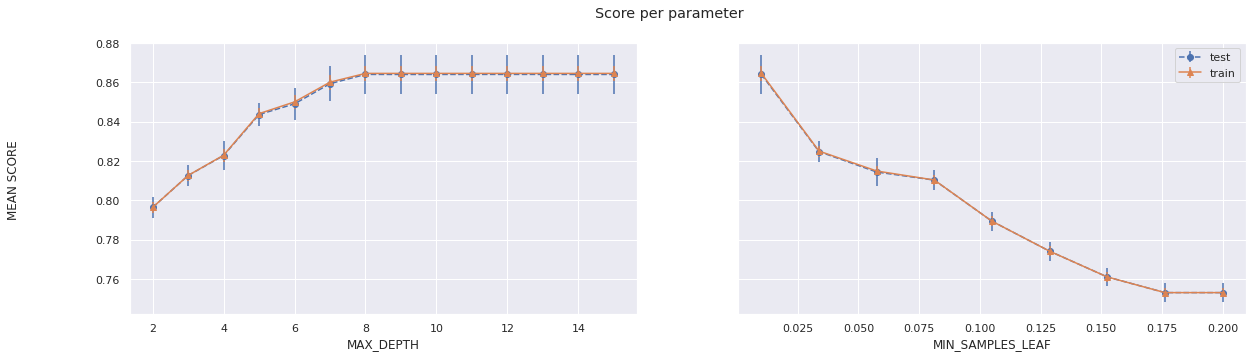

In [ ]:

# Calling Method 
plot_search_results(GridSearch)


In [ ]:
# Entrenamiento Óptimizado

dtree = DecisionTreeClassifier(max_depth = 8, 
                               min_samples_leaf = 0.01,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)
    
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)

<b>Bondad de ajuste</b>

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt          

,metric,dTree_train,dTree_test
0,AUC,0.803110,0.786351
1,Gini,0.606220,0.572702
2,Accuracy,0.843312,0.841752
3,Precision,0.137168,0.133098
4,Recall,0.559354,0.544346
5,F1-score,0.220310,0.213897


<b>Importancias del modelo</b>

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
314,ind_var30,4.148250e-01
142,var15,2.724633e-01
166,num_var22_ult1,1.171071e-01
365,num_var22_ult3,5.065551e-02
77,var38,3.335636e-02
295,num_var30,3.015470e-02
360,saldo_var30,2.508327e-02
105,ind_var41_0,1.247545e-02
137,imp_op_var41_efect_ult1,9.450797e-03
301,num_var41_0,8.950042e-03


# Random Forest

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
import time


In [ ]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100,
                             max_depth = 8, 
                             min_samples_leaf = 0.01,
                             oob_score = True,
                             verbose = 1, 
                             n_jobs = -1,
                             random_state = 123)


In [ ]:

import time
start_time = time.time()
rfc = rfc.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


----5.1053667068481445 seconds ---


In [ ]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
360,saldo_var30,0.107009
142,var15,0.104692
320,num_meses_var5_ult3,0.069349
314,ind_var30,0.063554
307,saldo_medio_var5_hace2,0.059775
...,...,...
325,num_var24,0.000027
181,ind_var10cte_ult1,0.000017
339,ind_var43_emit_ult1,0.000016
102,imp_aport_var13_hace3,0.000013


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [ ]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

 
metricsRes = pd.merge(metricsDtree, metricsRfc, on = 'metric', how='left') 
metricsRes        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,metric,dTree_train,dTree_test,rfc_train,rfc_test
0,AUC,0.797236,0.781922,0.799951,0.798694
1,Gini,0.594472,0.563845,0.599901,0.597388
2,Accuracy,0.960424,0.960449,0.960424,0.960449
3,Precision,0.000000,0.000000,0.000000,0.000000
4,Recall,0.000000,0.000000,0.000000,0.000000
5,F1-score,0.000000,0.000000,0.000000,0.000000


# AdaBoost

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
# Cargando librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time


In [ ]:
# Configuramos el modelo de adaboost

ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 1),
          n_estimators = 200,
          algorithm = 'SAMME.R',
          learning_rate = 0.5,
          random_state = 123)


In [ ]:
start_time = time.time()
ada_clf.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


----36.69933032989502 seconds ---


In [ ]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : ada_clf.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
77,var38,0.075
142,var15,0.065
262,saldo_medio_var5_hace3,0.050
360,saldo_var30,0.050
322,imp_op_var39_comer_ult1,0.040
...,...,...
214,saldo_medio_var8_hace3,0.005
273,saldo_medio_var13_corto_hace3,0.005
173,num_var5_0,0.005
189,imp_op_var40_efect_ult3,0.005


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf.predict(X_train[features])
X_test['prediction']  = ada_clf.predict(X_test[features])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
#Resumen de todas las métricas del modelo

metricsAdab = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'adab_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'adab_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

 
metricsRes = pd.merge(metricsRes, metricsAdab, on = 'metric', how='left') 
metricsRes        

,metric,dTree_train,dTree_test,rfc_train,rfc_test,adab_train,adab_test
0,AUC,0.797236,0.781922,0.799951,0.798694,0.858622,0.821658
1,Gini,0.594472,0.563845,0.599901,0.597388,0.717244,0.643317
2,Accuracy,0.960424,0.960449,0.960424,0.960449,0.960631,0.960405
3,Precision,0.000000,0.000000,0.000000,0.000000,0.720000,0.444444
4,Recall,0.000000,0.000000,0.000000,0.000000,0.008547,0.004435
5,F1-score,0.000000,0.000000,0.000000,0.000000,0.016893,0.008782


# XGBoost

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
# Cargando librerías

import numpy as np
import xgboost as xgb

In [ ]:

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)


In [ ]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic',
         'max_depth' : 8,
         'learning_rate': 0.05,
         'seed' : 123,
         'min_data_leaf' : int(round(y_train.shape[0]*0.01,0)),
         'grow_policy' : 'lossguide'}

param['eval_metric'] = 'auc'
num_round = 300         

evallist = [(dtrain,'train'), (dtest,'valid')]

In [ ]:

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist, 
                    early_stopping_rounds = 10)
print("----%s seconds ---" % ((time.time() - start_time)))


[0]	train-auc:0.844481	valid-auc:0.810725
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 10 rounds.
[1]	train-auc:0.848087	valid-auc:0.81317
[2]	train-auc:0.849033	valid-auc:0.813555
[3]	train-auc:0.850163	valid-auc:0.814168
[4]	train-auc:0.854143	valid-auc:0.816095
[5]	train-auc:0.857931	valid-auc:0.81916
[6]	train-auc:0.86008	valid-auc:0.820514
[7]	train-auc:0.861248	valid-auc:0.820431
[8]	train-auc:0.861431	valid-auc:0.820732
[9]	train-auc:0.862765	valid-auc:0.82123
[10]	train-auc:0.863181	valid-auc:0.821329
[11]	train-auc:0.864099	valid-auc:0.822415
[12]	train-auc:0.865626	valid-auc:0.822824
[13]	train-auc:0.866495	valid-auc:0.822201
[14]	train-auc:0.867308	valid-auc:0.822737
[15]	train-auc:0.868949	valid-auc:0.825208
[16]	train-auc:0.871409	valid-auc:0.825085
[17]	train-auc:0.872002	valid-auc:0.82578
[18]	train-auc:0.873106	valid-auc:0.826551
[19]	train-auc:0.874557	valid-auc:0.826692
[20]	train-a

<b>Variables del Modelo</b>

In [ ]:
importance = xgBoost.get_score(importance_type = 'total_gain')
importance

{'delta_imp_venta_var44_1y3': 0.9369742569999999,
 'delta_num_reemb_var13_1y3': 0.3946550338,
 'imp_aport_var13_ult1': 0.47077179,
 'imp_ent_var16_ult1': 55.27039617640005,
 'imp_op_var39_comer_ult1': 5.9525393829999995,
 'imp_op_var39_comer_ult3': 0.5969581608,
 'imp_op_var39_efect_ult1': 31.632717530380006,
 'imp_op_var39_efect_ult3': 1.010629653,
 'imp_op_var39_ult1': 4.860885141110002,
 'imp_op_var40_comer_ult1': 1.7053107010000002,
 'imp_op_var40_efect_ult1': 13.918794156800002,
 'imp_op_var40_ult1': 1.06797791,
 'imp_op_var41_comer_ult1': 49.090054156799994,
 'imp_op_var41_comer_ult3': 14.456933642899996,
 'imp_op_var41_efect_ult1': 9.010196678000002,
 'imp_op_var41_efect_ult3': 64.25952408590001,
 'imp_op_var41_ult1': 36.977809563750014,
 'imp_reemb_var13_ult1': 0.34481811500000004,
 'imp_sal_var16_ult1': 0.429574013,
 'imp_trans_var37_ult1': 18.2632438055,
 'imp_var43_emit_ult1': 45.956629541399984,
 'imp_var7_recib_ult1': 3.4806997474000005,
 'ind_var10cte_ult1': 4.28313136100

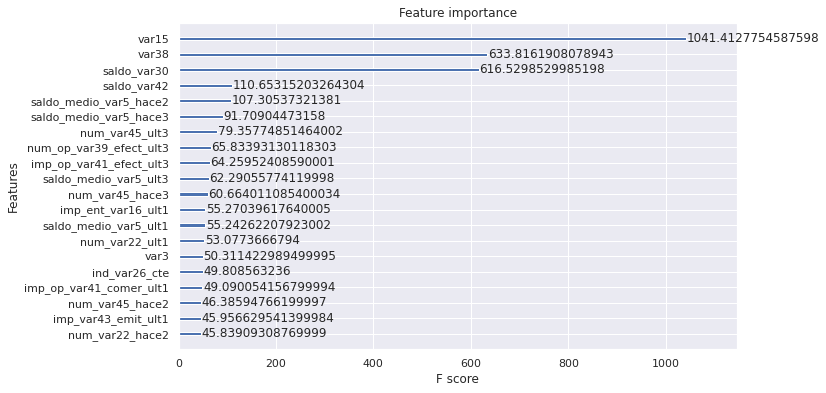

In [ ]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [ ]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

,Feature,Importance,C
1,var15,1041.412775,1
2,var38,633.816191,2
0,saldo_var30,616.529853,3
38,saldo_var42,110.653152,4
5,saldo_medio_var5_hace2,107.305373,5
...,...,...,...
113,num_op_var41_efect_ult3,0.312784,121
123,ind_var9_cte_ult1,0.200550,122
121,num_op_var39_comer_ult3,0.092201,123
102,ind_var30_0,0.079598,124


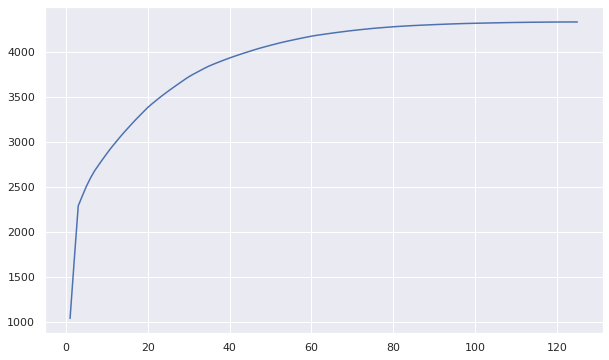

In [ ]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

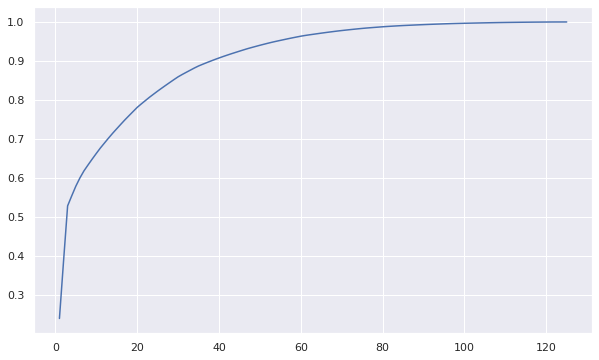

In [ ]:
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [ ]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)


In [ ]:
pdVarImp.transpose()

,1,2,0,38,5,46,10,31,20,78,8,28,52,13,49,29,43,3,9,36,37,4,27,24,6,23,18,39,25,19,7,21,32,14,35,15,30,77,51,11,...,92,112,67,85,110,70,106,108,93,86,104,109,58,60,54,103,65,115,96,72,100,111,95,122,119,117,105,118,116,114,120,101,97,94,99,113,123,121,102,124
Feature,var15,var38,saldo_var30,saldo_var42,saldo_medio_var5_hace2,saldo_medio_var5_hace3,num_var45_ult3,num_op_var39_efect_ult3,imp_op_var41_efect_ult3,saldo_medio_var5_ult3,num_var45_hace3,imp_ent_var16_ult1,saldo_medio_var5_ult1,num_var22_ult1,var3,ind_var26_cte,imp_op_var41_comer_ult1,num_var45_hace2,imp_var43_emit_ult1,num_var22_hace2,saldo_var37,num_var22_ult3,imp_op_var41_ult1,var36,num_var22_hace3,saldo_var5,num_var45_ult1,imp_op_var39_efect_ult1,num_med_var22_ult3,num_meses_var39_vig_ult3,num_op_var39_ult1,saldo_medio_var8_ult1,saldo_medio_var8_ult3,num_var42_0,num_var1_0,saldo_var8,imp_trans_var37_ult1,num_op_var41_ult3,num_op_var41_comer_ult3,num_var4,...,saldo_medio_var12_hace2,saldo_medio_var13_corto_ult3,num_op_var39_ult3,ind_var32_cte,saldo_var13_corto,num_op_var40_hace2,ind_var25_cte,imp_op_var40_comer_ult1,num_op_var40_efect_ult3,num_op_var41_ult1,num_var43_recib_ult1,num_op_var41_hace2,saldo_var14,num_var14_0,imp_op_var40_ult1,imp_op_var39_efect_ult3,num_var41_0,num_aport_var13_ult1,saldo_var12,delta_imp_venta_var44_1y3,num_op_var39_comer_ult1,ind_var12_0,saldo_var32,saldo_var24,num_var13_corto_0,ind_var19,imp_op_var39_comer_ult3,num_var30_0,ind_var9_ult1,num_var42,imp_aport_var13_ult1,imp_sal_var16_ult1,delta_num_reemb_var13_1y3,ind_var31,imp_reemb_var13_ult1,num_op_var41_efect_ult3,ind_var9_cte_ult1,num_op_var39_comer_ult3,ind_var30_0,num_op_var39_hace3
Importance,1041.41,633.816,616.53,110.653,107.305,91.709,79.3577,65.8339,64.2595,62.2906,60.664,55.2704,55.2426,53.0774,50.3114,49.8086,49.0901,46.3859,45.9566,45.8391,38.5958,37.0489,36.9778,34.359,34.0879,32.7691,32.2043,31.6327,31.4065,30.5006,25.8076,24.4521,24.0734,24.0234,22.0872,18.9091,18.2632,17.5948,17.3954,16.6777,...,2.14306,2.11102,2.06574,2.03765,1.964,1.83714,1.80611,1.70531,1.62487,1.6229,1.49832,1.48178,1.19876,1.12646,1.06798,1.01063,0.99781,0.963848,0.951067,0.936974,0.907259,0.893273,0.889893,0.762099,0.692423,0.615756,0.596958,0.571899,0.493428,0.491757,0.470772,0.429574,0.394655,0.351894,0.344818,0.312784,0.20055,0.0922012,0.0795981,0.0538352
C,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
porc_gain,0.240309,0.146255,0.142266,0.0255335,0.024761,0.0211621,0.018312,0.0151914,0.0148281,0.0143737,0.0139984,0.0127538,0.0127474,0.0122478,0.0116095,0.0114935,0.0113277,0.0107037,0.0106046,0.0105775,0.00890608,0.00854914,0.00853273,0.00792843,0.00786588,0.00756156,0.00743123,0.00729934,0.00724713,0.00703809,0.00595519,0.00564239,0.00555501,0.00554348,0.00509668,0.00436333,0.00421429,0.00406005,0.00401403,0.00384842,...,0.000494518,0.000487123,0.000476675,0.000470193,0.000453198,0.000423925,0.000416766,0.000393505,0.000374943,0.000374488,0.000345741,0.000341926,0.000276617,0.000259934,0.000246439,0.000233206,0.000230248,0.000222411,0.000219461,0.000216209,0.000209353,0.000206125,0.000205345,0.000175856,0.000159779,0.000142087,0.00013775,0.000131967,0.00011386,0.000113474,0.000108632,9.91254e-05,9.10677e-05,8.12005e-05,7.95677e-05,7.21757e-05,4.62775e-05,2.12757e-05,1.83675e-05,1.24226e-05
porc_gain_acum,0.240309,0.386564,0.52883,0.554363,0.579124,0.600286,0.618598,0.63379,0.648618,0.662992,0.67699,0.689744,0.702491,0.714739,0.726348,0.737842,0.74917,0.759873,0.770478,0.781055,0.789961,0.798511,0.807043,0.814972,0.822838,0.830399,0.83783,0.84513,0.852377,0.859415,0.86537,0.871013,0.876568,0.882111,0.887208,0.891571,0.895785,0.899845,0.903859,0.907708,...,0.991311,0.991798,0.992275,0.992745,0.993198,0.993622,0.994039,0.994433,0.994808,0.995182,0.995528,0.99587,0.996146,0.996406,0.996

In [ ]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features], label = y_train))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features], label = y_test))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
#Resumen de todas las métricas del modelo

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

 
metricsRes = pd.merge(metricsRes, metricsXGB, on = 'metric', how='left') 
metricsRes       

,metric,dTree_train,dTree_test,rfc_train,rfc_test,adab_train,adab_test,xgb_train,xgb_test
0,AUC,0.797236,0.781922,0.799951,0.798694,0.858622,0.821658,0.904127,0.831392
1,Gini,0.594472,0.563845,0.599901,0.597388,0.717244,0.643317,0.808254,0.662784
2,Accuracy,0.960424,0.960449,0.960424,0.960449,0.960631,0.960405,0.962942,0.960142
3,Precision,0.000000,0.000000,0.000000,0.000000,0.720000,0.444444,1.000000,0.266667
4,Recall,0.000000,0.000000,0.000000,0.000000,0.008547,0.004435,0.063628,0.004435
5,F1-score,0.000000,0.000000,0.000000,0.000000,0.016893,0.008782,0.119643,0.008724


# Random Search

In [ ]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [ ]:
# setear valores iniciales

paramGrid = {'objetive' : ['binary_logistic'],
         'max_depth' : [5,6,7,8,9,10],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2],
         'min_data_leaf' : [int(round(y_train.shape[0]*0.01,0)), int(round(y_train.shape[0]*0.025,0)), int(round(y_train.shape[0]*0.05,0))],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [1,2,3,4,5,6,7,8,9,10]}

param['eval_metric'] = 'auc'
num_round = 100

pdResults = pd.DataFrame()



In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [ ]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10     

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

****** Iteration : 0
[0]	train-auc:0.838721	valid-auc:0.813491
[5]	train-auc:0.842727	valid-auc:0.816582
[9]	train-auc:0.84373	valid-auc:0.816719
****** Iteration : 1
[0]	train-auc:0.831758	valid-auc:0.808203
[5]	train-auc:0.849043	valid-auc:0.822288
[9]	train-auc:0.856714	valid-auc:0.825254
****** Iteration : 2
[0]	train-auc:0.854739	valid-auc:0.808661
[5]	train-auc:0.857766	valid-auc:0.811516
[9]	train-auc:0.860685	valid-auc:0.812316
****** Iteration : 3
[0]	train-auc:0.841616	valid-auc:0.811086
[5]	train-auc:0.858271	valid-auc:0.81953
[9]	train-auc:0.866432	valid-auc:0.824472
****** Iteration : 4
[0]	train-auc:0.854108	valid-auc:0.806773
[5]	train-auc:0.858864	valid-auc:0.810273
[9]	train-auc:0.860092	valid-auc:0.811236
****** Iteration : 5
[0]	train-auc:0.831794	valid-auc:0.808306
[5]	train-auc:0.833838	valid-auc:0.810218
[9]	train-auc:0.833866	valid-auc:0.810762
****** Iteration : 6
[0]	train-auc:0.83879	valid-auc:0.813744
[5]	train-auc:0.848733	valid-auc:0.819912
[9]	train-auc:0.

KeyboardInterrupt: ignored

In [ ]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

In [ ]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
92,10,learning_rate,0.01,66.921746,62.349869,4.571877
90,10,objetive,binary_logistic,66.921746,62.349869,4.571877
91,10,max_depth,5,66.921746,62.349869,4.571877
93,10,seed,123,66.921746,62.349869,4.571877
94,10,max_leaves,2,66.921746,62.349869,4.571877
...,...,...,...,...,...,...
86,9,min_data_leaf,532,81.927446,63.931089,17.996357
87,9,grow_policy,lossguide,81.927446,63.931089,17.996357
88,9,min_child_weight,5,81.927446,63.931089,17.996357
403,44,min_child_weight,5,81.927446,63.931089,17.996357


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


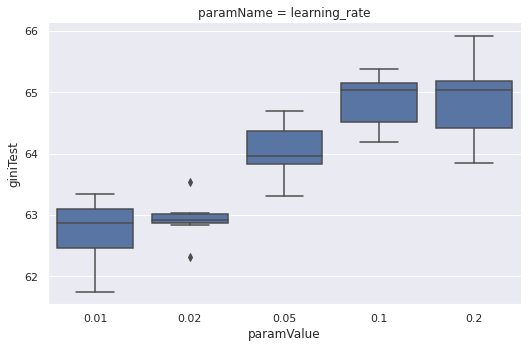

In [ ]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'eta'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='learning_rate'],
              row="paramName", 
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


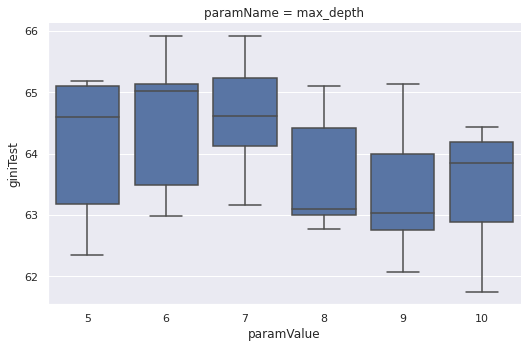

In [ ]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName", 
              sharex=False, size=5, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

# Implementación de Modelos

In [ ]:
import pickle

In [ ]:
xgBoost

In [ ]:
objectToSave = xgBoost
filename = "./XGBoost.xgb"
pickle.dump(objectToSave, open(filename, 'wb'))
print("done")

done


In [ ]:
filename = "./XGBoost.xgb"
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model

In [ ]:
loaded_model.predict(xgb.DMatrix(X_test[features], label = y_test))


array([0.03025776, 0.04972455, 0.02464089, ..., 0.01750395, 0.11165103,
       0.03048143], dtype=float32)

---

# Gracias por completar este laboratorio!

---

